In [1]:
# 'use_log'와 'customer_join' 테이블의 대략적인 형태와 결측치 파악
uselog = pd.read_csv("./pyda100-master/Chapter_4/use_log.csv")
display(uselog.head())
display(uselog.isna().sum())

customer = pd.read_csv("customer_join.csv")
display(customer.head())
display(customer.isna().sum())


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


log_id         0
customer_id    0
usedate        0
dtype: int64

,customer_id,gender,start_date,end_date,is_deleted,class,class_name,campaign_id,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,F,2015-05-01,NaN,0,C01,0_종일,CA1,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,M,2015-05-01,NaN,0,C01,0_종일,CA1,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,M,2015-05-01,NaN,0,C01,0_종일,CA1,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,F,2015-05-01,NaN,0,C01,0_종일,CA1,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,F,2015-05-01,NaN,0,C03,2_야간,CA1,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


customer_id             0
gender                  0
start_date              0
end_date             2842
is_deleted              0
class                   0
class_name              0
campaign_id             0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [2]:
# 'mean', 'median', 'max', 'min', 'membership_period'변수를 클러스터링을 위한 독립변수로 선정
customer_variables_for_clustering = customer.loc[:, ["mean", "median", "max", "min", "membership_period"]]
customer_variables_for_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [3]:
'''
'K-mean'를 활용한 클러스터링 실시
'''

# 사용될 독립변수들에 표준화 실시
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customer_scaled = sc.fit_transform(customer_variables_for_clustering)
print(customer_scaled, "\n")

# 클러스터링 실시
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_scaled)

# 클러스터링 결과 확인
print("clustering 결과 :", clusters.labels_)
print("clustering 결과 내 요소 개수 :", len(clusters.labels_))
print("clustering 결과 내 고유 요소 개수 :", len(set(list(clusters.labels_))))
print("훈련 데이터 셋 내 데이터 개수 :", len(customer_scaled), "\n")

# 클러스터링 결과를 'customer_variables_for_clustering'데이터 셋에 컬럼으로 추가
customer_variables_for_clustering["cluster"] = clusters.labels_
customer_variables_for_clustering.head()

[[-0.28120614 -0.13367635  0.08117747 -0.5336197   2.03402524]
 [-0.14054502 -0.13367635 -0.37992814 -0.02114919  2.03402524]
 [-0.42186727 -0.13367635 -0.84103375 -0.02114919  2.03402524]
 ...
 [ 1.50050144  1.46662237  0.08117747  2.54120338 -1.28811491]
 [ 3.18843493  3.06692109  1.46449428  4.07861492 -1.28811491]
 [ 2.62579043  2.53348819  1.00338868  3.56614441 -1.28811491]] 

clustering 결과 : [1 1 1 ... 0 0 0]
clustering 결과 내 요소 개수 : 4192
clustering 결과 내 고유 요소 개수 : 4
훈련 데이터 셋 내 데이터 개수 : 4192 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


In [4]:
'''
클러스터링 결과 분석
'''
# 클러스터별 고객수 확인
customer_variables_for_clustering.columns = ["월 방문횟수 평균값", "월 방문횟수 중앙값", "월 방문횟수 최댓값", "월 방문횟수 최솟값", "회원기간", "cluster"]
customer_variables_for_clustering.head()
customer_variables_for_clustering.groupby("cluster").count()

,월 방문횟수 평균값,월 방문횟수 중앙값,월 방문횟수 최댓값,월 방문횟수 최솟값,회원기간
cluster,,,,,
0,841,841,841,841,841
1,1248,1248,1248,1248,1248
2,771,771,771,771,771
3,1332,1332,1332,1332,1332


In [5]:
# 클러스터별 평균값 확인
customer_variables_for_clustering.groupby("cluster").mean()

,월 방문횟수 평균값,월 방문횟수 중앙값,월 방문횟수 최댓값,월 방문횟수 최솟값,회원기간
cluster,,,,,
0,8.061076,8.046373,10.015458,6.171225,7.027348
1,4.677436,4.671074,7.233173,2.153045,36.925481
2,3.065504,2.900130,4.783398,1.649805,9.276265
3,5.537658,5.388889,8.753754,2.702703,14.876126


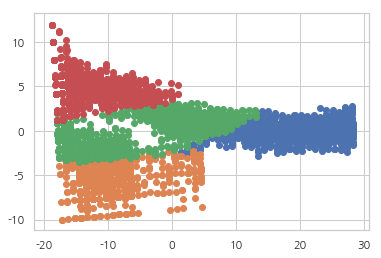

In [6]:
'''
'주성분 분석'을 통한 차원 축소를 이용하여, 클러스터링 결과 시각화 실시
'''

# 'customer_variables_for_clustering'에 PCA 실시
from sklearn.decomposition import PCA
X = customer_variables_for_clustering
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)

# pca 결과를 Dataframe으로 생성한 뒤, 해당 Dataframe에 'cluster'컬럼 추가
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_variables_for_clustering["cluster"]
pca_df.head()

# matplotlib으로 시각화
%matplotlib inline
for i in customer_variables_for_clustering["cluster"].unique():
    
    tmp = pca_df.loc[pca_df["cluster"] == i, :]
    plt.scatter(tmp[0], tmp[1])
plt.show()

In [7]:
'''
클러스터링으로 분할된 4개의 그룹에 지속 회원과 탈퇴 회원이 각각 얼마나 존재하는지 확인하기
'''
# 'customer_variables_for_clustering'데이터 셋과 'customer'데이터 셋을 JOIN 실시
# (두 데이터 셋이 서로 공유하는 컬럼이 없기 떼문에, concat()으로 두 데이터 셋을 결합해야 함)
display(customer_variables_for_clustering.head())
display(customer.head())
customer_variables_for_clustering = pd.concat([customer_variables_for_clustering, customer], axis = 1)
display(customer_variables_for_clustering.groupby(["cluster", "is_deleted"], as_index = False).count().loc[:, ["cluster", "customer_id"]])


,월 방문횟수 평균값,월 방문횟수 중앙값,월 방문횟수 최댓값,월 방문횟수 최솟값,회원기간,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


,customer_id,gender,start_date,end_date,is_deleted,class,class_name,campaign_id,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,F,2015-05-01,NaN,0,C01,0_종일,CA1,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,M,2015-05-01,NaN,0,C01,0_종일,CA1,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,M,2015-05-01,NaN,0,C01,0_종일,CA1,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,F,2015-05-01,NaN,0,C01,0_종일,CA1,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,F,2015-05-01,NaN,0,C03,2_야간,CA1,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


,cluster,customer_id
0,0,822
1,0,19
2,1,1230
3,1,18
4,2,771
5,3,790
6,3,542


In [8]:
'''

다음 달의 이용 횟수 예측을 위해, 데이터 준비

'''

# uselog 데이터 셋의 'usedate'컬럼 자료형 변경
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["연월", "customer_id"], as_index=False).count()
uselog_months.rename(columns = {"log_id" : "count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [9]:
# 이번 달부터 과거 5개월분의 이용 횟수와 다음 달의 이용 횟수를 저장함
# '이번 달'에 대한 대상은 2018년 10월부터 2019년 3월까지임

year_months = list(uselog_months["연월"].unique())
print("year_months :")
print(year_months, "\n")

predict_data = pd.DataFrame()

for i in range(6, len(year_months)):
    
    tmp = uselog_months.loc[uselog_months["연월"] == year_months[i], :]
    tmp.rename(columns = {"count" : "count_pred"}, inplace = True)
#     display(tmp)
    for j in range(1,7):
        
        tmp_before = uselog_months.loc[uselog_months["연월"] == year_months[i - j]]
        del tmp_before["연월"]
#         display(tmp_before)
        tmp_before.rename(columns = {"count" : "count_{}".format(j-1)}, inplace = True)
        tmp = pd.merge(tmp, tmp_before, on = "customer_id", how = "left")
    predict_data = pd.concat([predict_data, tmp], ignore_index=True)

predict_data = predict_data.sort_values(by = ["customer_id"])
display(predict_data)

year_months :
['201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903'] 



,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
6115,201812,AS002855,2,5.0,3.0,7.0,3.0,5.0,5.0
9228,201901,AS002855,6,2.0,5.0,3.0,7.0,3.0,5.0
12320,201902,AS002855,5,6.0,2.0,5.0,3.0,7.0,3.0
15357,201903,AS002855,4,5.0,6.0,2.0,5.0,3.0,7.0
3070,201811,AS002855,5,3.0,7.0,3.0,5.0,5.0,5.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
9229,201901,AS008805,1,5.0,3.0,2.0,2.0,5.0,7.0
3071,201811,AS008805,3,2.0,2.0,5.0,7.0,8.0,NaN
12321,201902,AS008805,6,1.0,5.0,3.0,2.0,2.0,5.0


In [10]:
# 위 결과에서 결측치 제거
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop = True)
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201812,AS002855,2,5.0,3.0,7.0,3.0,5.0,5.0
2,201901,AS002855,6,2.0,5.0,3.0,7.0,3.0,5.0
3,201902,AS002855,5,6.0,2.0,5.0,3.0,7.0,3.0
4,201903,AS002855,4,5.0,6.0,2.0,5.0,3.0,7.0


In [11]:
# 위 결과에 회원 기간 컬럼 추가
predict_data = pd.merge(predict_data, customer[["customer_id", "start_date"]], on = "customer_id", how = "left")
print("'predict_data'에 'customer'데이터 셋의 'start_date'컬럼 추가 :")
display(predict_data.head())

from dateutil.relativedelta import relativedelta
predict_data["now_date"] = pd.to_datetime(predict_data['연월'], format = "%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
predict_data["period"] = None
for i in range(len(predict_data)):
    
    delta = relativedelta(predict_data["now_date"].loc[i], predict_data["start_date"].loc[i])
    predict_data["period"].loc[i] = delta.years*12 + delta.months
print("\n", "'period'컬럼 추가")
display(predict_data.head())
    


'predict_data'에 'customer'데이터 셋의 'start_date'컬럼 추가 :


,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201812,AS002855,2,5.0,3.0,7.0,3.0,5.0,5.0,2016-11-01
2,201901,AS002855,6,2.0,5.0,3.0,7.0,3.0,5.0,2016-11-01
3,201902,AS002855,5,6.0,2.0,5.0,3.0,7.0,3.0,2016-11-01
4,201903,AS002855,4,5.0,6.0,2.0,5.0,3.0,7.0,2016-11-01



 'period'컬럼 추가


,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201812,AS002855,2,5.0,3.0,7.0,3.0,5.0,5.0,2016-11-01,2018-12-01,25
2,201901,AS002855,6,2.0,5.0,3.0,7.0,3.0,5.0,2016-11-01,2019-01-01,26
3,201902,AS002855,5,6.0,2.0,5.0,3.0,7.0,3.0,2016-11-01,2019-02-01,27
4,201903,AS002855,4,5.0,6.0,2.0,5.0,3.0,7.0,2016-11-01,2019-03-01,28


In [18]:
'''

LinearRegression 모델 제작

'''

from sklearn import linear_model
import sklearn.model_selection

# 2018년 4월 이후에 새로 가입한 회원만 추출
predict_data = predict_data.loc[predict_data["start_date"] >= pd.to_datetime("20180401")]

# model 제작
model = linear_model.LinearRegression()

X = predict_data[["count_0", "count_1", "count_2", "count_3", "count_4", "count_5", "period"]]
y = predict_data["count_pred"]

# 데이터 셋을 train셋과 test셋으로 분할
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
print("train셋에 대한 평가점수 :", model.score(X_train, y_train))
print("test셋에 대한 평가점수 :", model.score(X_test, y_test))

train셋에 대한 평가점수 : 0.617375834748802
test셋에 대한 평가점수 : 0.5772672959648999


In [22]:
# 각 독립변수의 계수 출력
coef = pd.DataFrame({"feature_names" : X.columns, "coefficient" : model.coef_})
coef

,feature_names,coefficient
0,count_0,0.352090
1,count_1,0.195822
2,count_2,0.164707
3,count_3,0.146963
4,count_4,0.099060
5,count_5,0.086785
6,period,0.073595


In [23]:
# 새로운 회원 두 명에 대한 다음 달의 이용 횟수 예측
x1 = [3,4,4,6,8,7,8]
x2 = [2,2,3,3,4,6,8]
x_pred = [x1, x2]

model.predict(x_pred)

array([3.75455386, 1.92220021])

In [24]:
uselog_months.to_csv("use_log_months.csv", index = False)